## matplotlib 시각화 이쁘게 만들기

C:\Users\j2hoo\AppData\Local\Temp\ipykernel_29912\2501119921.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
C:\Users\j2hoo\AppData\Local\Temp\ipykernel_29912\2501119921.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
C:\Users\j2hoo\AppData\Local\Temp\ipykernel_29912\2501119921.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], si

17.68
17.15
20.44
21.41
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>


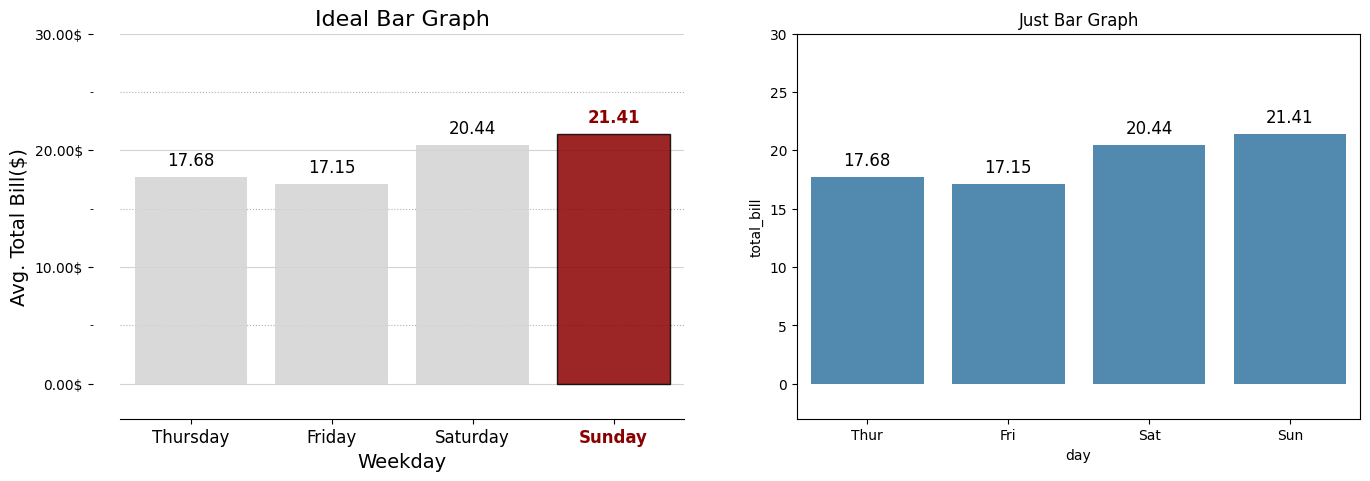

In [18]:
## 1단계 : 라이브러리 및 데이터 불러오기
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

# Seaborn에서 'tips' 데이터셋을 로드합니다.
tips = sns.load_dataset("tips")

## 2단계 : 시각화 객체와 서브플롯 설정
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

## 3단계 : y축 레이블 포맷터 정의
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

## 4단계 : 첫번째 그래프 작성 (1) - chart
ax0 = sns.barplot(x="day", y='total_bill', data=tips,
                  errorbar=None, color='lightgray', alpha=0.85, zorder=2,
                  ax=ax[0])


## 5단계 : 첫번째 그래프 작성 (2) - 막대그래프 스타일 및 텍스트 레이블 추가
# 각 요일별 평균 총 요금을 계산하고 가장 높은 요금을 가진 요일을 찾습니다.
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)

# 각 막대에 대해 개별적으로 스타일을 적용하고 텍스트 레이블을 추가합니다.
for p in ax0.patches:
    fontweight = "normal"
    color = "k"
    height = np.round(p.get_height(), 2)
    print(height)
    if h_mean == height:
        fontweight = "bold"
        color = "darkred"
        p.set_facecolor(color)
        p.set_edgecolor("black")
    ax0.text(p.get_x() + p.get_width() / 2., height + 1, height, ha='center',
             size=12, fontweight=fontweight, color=color)

## 6단계 : 첫번째 그래프 서브플롯 설정 및 그리드 추가
# 서브플롯의 제목, 축 범위, 스파인 가시성을 설정합니다.
ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size=16)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

# y축에 대한 메이저 및 마이너 로케이터와 포맷터를 설정합니다.
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

# y축 레이블 설정
ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

# y축에 그리드를 추가합니다. 메이저 그리드는 일반 선으로, 마이너 그리드는 점선으로 표시됩니다.
ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

# x축 레이블 및 틱 레이블 설정
ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
    if xtick.get_text() == h_day:
        xtick.set_color("darkred")
        xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)


## 7단계 : 두번째 Simple 그래프 작성
ax1 = sns.barplot(x="day", y='total_bill', data=tips,
                  errorbar=None, alpha=0.85,
                  ax=ax[1])
for p in ax1.patches:
    print(type(p))
    height = np.round(p.get_height(), 2)
    ax1.text(p.get_x() + p.get_width() / 2., height + 1, height, ha='center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

## 8단계 : 전체 그래프 표시
plt.show()